In [ ]:
# used GARBAGE-CLASSIFICATION dataset was trying to clone the images in a new project and add new photos to it and labelling them I was still working on it
# but if i trained it I will train on google colab
#Dataset version 1.0 not accurate 
#Dataset2 version 2.0 of the dataset we made 
#GarbagePlastic made a video extracted images from and trained but was trying to get accuracy still(one object only trained I still wa trying it's accuracy)
# It is better to download dataset on your computer because I was training on colab and changed paths to not face data.yaml path error because all the paths are absoulte pathes
# you will need to change the paths to your own paths (I used absloute paths because relative didn't work for me) 

In [17]:
# Geforce MX330 doesn't support CUDA, so I used google colab for training but it had limit or I installed the CPU version of PyTorch
# Compute capability https://developer.nvidia.com/cuda-gpus 
# If there is a way I can install old version of PyTorch with CUDA support, please let me know (tried installing old version of PyTorch but it didn't work using python 3.12.3)
!nvidia-smi

Wed May 15 22:53:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.44                 Driver Version: 552.44         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce MX330         WDDM  |   00000000:02:00.0 Off |                  N/A |
| N/A   69C    P8             N/A / ERR!  |       0MiB /   2048MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [16]:
import sys
print(sys.executable)


d:\ImageProcessing\project\Scripts\python.exe


In [ ]:
%pip install ultralytics roboflow

In [ ]:
# Install the Roboflow Inference Library for trying to inferencing from Roboflow api of already trained mode
!pip install roboflowoak

In [ ]:
!pip install jupyter


In [ ]:
%pip uninstall -y torch torchvision torchaudio

In [ ]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
# Install the depthai library (not needed to be installed)
!python -mpip install depthai

In [8]:
#from roboflow import Roboflow
from ultralytics import YOLO
from roboflow import Roboflow
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks



Ultralytics YOLOv8.1.19 🚀 Python-3.12.3 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce MX330, 2048MiB)
Setup complete ✅ (8 CPUs, 7.8 GB RAM, 610.1/931.5 GB disk)

OS                  Windows-10-10.0.19045-SP0
Environment         Windows
Python              3.12.3
Install             pip
RAM                 7.78 GB
CPU                 Intel Core(TM) i5-1035G1 1.00GHz
CUDA                11.8

matplotlib          ✅ 3.8.3>=3.3.0
opencv-python       ✅ 4.9.0.80>=4.6.0
pillow              ✅ 10.2.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.12.0>=1.4.1
torch               ✅ 2.2.1+cu118>=1.8.0
torchvision         ✅ 0.17.1+cu118>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.8
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.2.1>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0


In [5]:
!pip show torch

Name: torch
Version: 2.2.1+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: D:\ImageProcessing\project\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: thop, torchaudio, torchvision, ultralytics


In [2]:
import torch
print(torch.__version__)


2.2.1+cu118


In [19]:
import torchvision
print(torchvision.__version__)

0.17.1+cu118


In [3]:
print(torch.version.cuda)

11.8


In [4]:
# Although it is true, I can't use the GPU because of the MX330
torch.cuda.is_available()

True

In [1]:
# dataset version 2 for the dataset we were collecting me and salma increased photo size using augmentation
# Dataset itself is not public, but you could view the dataset here: https://app.roboflow.com/yk-d9yxp/dataset-test-ypl47
# used roboflow triaing credit to test accuracy of the model you could view it here: https://app.roboflow.com/yk-d9yxp/dataset-test-ypl47/visualize/1
from roboflow import Roboflow
rf = Roboflow(api_key="g5dbPnMnBUuuxAUnwbsq")
project = rf.workspace("yk-d9yxp").project("dataset-test-ypl47")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.19, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Dataset-test-2 in yolov8:: 100%|██████████| 494/494 [00:01<00:00, 399.37it/s]


In [ ]:
# dataset version 1 first version less accuracy
# Initialize Roboflow API
rf = Roboflow(api_key="g5dbPnMnBUuuxAUnwbsq")

# Specify your project and version
project = rf.workspace("yk-d9yxp").project("dataset-test-ypl47")
version = project.version(1)

# Download the dataset
dataset = version.download("yolov8")


In [9]:
# New dataset for plastic was trying video and extracting mutliple images from it using fps was going to do this with every class but I was still
# to not face overfitting
# was trying to better accuracy https://docs.ultralytics.com/guides/yolo-performance-metrics/
# annotated them used roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="g5dbPnMnBUuuxAUnwbsq")
project = rf.workspace("yk-d9yxp").project("garbage-awyac")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.19, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Garbage-1 in yolov8:: 100%|██████████| 2366/2366 [00:04<00:00, 579.12it/s]


In [ ]:
# You could try training them on your computer but I couldn't because of gpu I trained on google colab and put results in runs
#Load the YOLOv8m model
model = YOLO("yolov8m.pt")

results = model.train(data="D:\ImageProcessing\project\GarbagePlastic\data.yaml", epochs=10, imgsz=640,device = 0)

invalid escape sequence '\I'
invalid escape sequence '\I'
invalid escape sequence '\I'


New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.12.3 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce MX330, 2048MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=D:\ImageProcessing\project\GarbagePlastic\data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

train: Scanning D:\ImageProcessing\project\GarbagePlastic\train\labels.cache... 1025 images, 16 backgrounds, 0 corrupt:

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 537, len(boxes) = 1156. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning D:\ImageProcessing\project\GarbagePlastic\valid\labels.cache... 101 images, 3 backgrounds, 0 corrupt: 100

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 53, len(boxes) = 113. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train24\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train24
Starting training for 10 epochs...
Closing dataloader mosaic


In [7]:
# You could try training this model on the computer
#Load the YOLOv8m model
model = YOLO("yolov8m.pt")

# Set the device to CPU
model = model.to("cpu")

results = model.train(data="D:\ImageProcessing\Dataset2\data.yaml", epochs=1, imgsz=640)

invalid escape sequence '\I'
invalid escape sequence '\I'
invalid escape sequence '\I'


Ultralytics YOLOv8.1.19 🚀 Python-3.12.3 torch-2.2.1+cu118 CUDA:0 (NVIDIA GeForce MX330, 2048MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=D:\ImageProcessing\Dataset2\data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning D:\ImageProcessing\Dataset2\train\labels.cache... 212 images, 16 backgrounds, 0 corrupt: 100%|██████████| 212/212 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 135, len(boxes) = 204. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning D:\ImageProcessing\Dataset2\valid\labels.cache... 22 images, 1 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 18, len(boxes) = 21. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train22\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)


In [13]:
# trying to train my dataset on cpu 
# Load the YOLOv8m model
model = YOLO("yolov8m.pt")

# Set the device to CPU
#model = model.to("cpu")

results = model.train(data="D:\ImageProcessing\project\Dataset\data.yaml", epochs=10, imgsz=640)

invalid escape sequence '\I'
invalid escape sequence '\I'
invalid escape sequence '\I'


New https://pypi.org/project/ultralytics/8.2.15 available 😃 Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=D:\ImageProcessing\project\Dataset\data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning D:\ImageProcessing\project\Dataset\train\labels... 80 images, 11 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:01<00:00, 72.85it/s] 

train: New cache created: D:\ImageProcessing\project\Dataset\train\labels.cache



val: Scanning D:\ImageProcessing\project\Dataset\valid\labels... 22 images, 2 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<00:00, 120.44it/s]

val: New cache created: D:\ImageProcessing\project\Dataset\valid\labels.cache


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train10
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.191G      1.186      6.927      2.045         15        640: 100%|██████████| 5/5 [08:41<00:00, 104.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:32<00:00, 32.13s/it]

                   all         22         20      0.431      0.054     0.0358     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.185G      0.948      4.075      1.662         16        640: 100%|██████████| 5/5 [08:07<00:00, 97.45s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:26<00:00, 26.90s/it]

                   all         22         20      0.246     0.0744     0.0931     0.0664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.185G     0.8024      3.138      1.482         15        640: 100%|██████████| 5/5 [07:48<00:00, 93.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:26<00:00, 26.70s/it]

                   all         22         20      0.858      0.134      0.153     0.0908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.185G     0.8463      2.586      1.562         13        640: 100%|██████████| 5/5 [07:24<00:00, 88.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:26<00:00, 26.81s/it]

                   all         22         20      0.631      0.472       0.45      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.185G     0.7878      2.352      1.457         17        640: 100%|██████████| 5/5 [07:10<00:00, 86.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:25<00:00, 25.65s/it]

                   all         22         20      0.405      0.628      0.456      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.185G     0.7062      2.065      1.337         13        640: 100%|██████████| 5/5 [07:09<00:00, 85.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:25<00:00, 25.20s/it]

                   all         22         20       0.29      0.472      0.385      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.185G      0.664      2.183      1.373         15        640: 100%|██████████| 5/5 [07:01<00:00, 84.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:24<00:00, 24.19s/it]

                   all         22         20      0.691      0.514      0.423      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.185G     0.6731      1.804      1.329         16        640: 100%|██████████| 5/5 [07:05<00:00, 85.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:24<00:00, 24.96s/it]

                   all         22         20      0.599      0.591      0.491      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.185G     0.6115       1.56      1.264         14        640: 100%|██████████| 5/5 [08:04<00:00, 96.86s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:24<00:00, 24.78s/it]

                   all         22         20      0.348      0.511      0.479      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.185G     0.5751      1.363      1.195         14        640: 100%|██████████| 5/5 [07:12<00:00, 86.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:26<00:00, 26.34s/it]

                   all         22         20      0.669      0.438      0.471      0.352



10 epochs completed in 1.363 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 52.0MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 52.0MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.12.3 torch-2.2.1+cu118 CPU (Intel Core(TM) i5-1035G1 1.00GHz)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:21<00:00, 21.55s/it]


                   all         22         20      0.669      0.438      0.471      0.352
                 Metal         22          4      0.598       0.75      0.825      0.729
             cardboard         22          1          0          0      0.166      0.149
                 glass         22          2          1          0     0.0881     0.0787
                 paper         22          1          1          0      0.111     0.0884
               plastic         22          9      0.668      0.894      0.809      0.589
                 trash         22          3      0.746      0.985       0.83       0.48
Speed: 2.4ms preprocess, 937.2ms inference, 0.0ms loss, 22.8ms postprocess per image
Results saved to runs\detect\train10


In [1]:
# tried to run inference of pre-trained model
!pip install inference-sdk

   ---------------------------------------- 0.0/369.0 kB ? eta -:--:--
   ------ --------------------------------- 61.4/369.0 kB 1.7 MB/s eta 0:00:01
   --------------- ------------------------ 143.4/369.0 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 225.3/369.0 kB 1.5 MB/s eta 0:00:01
   ----------------------------------- ---- 327.7/369.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 369.0/369.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/111.0 kB ? eta -:--:--
   --------------------------------- ------ 92.2/111.0 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 111.0/111.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.5 kB ? eta -:--:--
   ---------------------------------------- 50.5/50.5 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
   ---------------------------------------- 49.3/49.3 kB 1.3 MB/s eta 0:00:00
   -

In [6]:
# other dataset https://universe.roboflow.com/pumtacho/trashclass-zuu3r
# https://universe.roboflow.com/pumtacho/trashclass-zuu3r/dataset/1 validation model
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="g5dbPnMnBUuuxAUnwbsq"
)

result = CLIENT.infer("D:\ImageProcessing\Image.jpg", model_id="trashclass-zuu3r/1")

In [ ]:
from IPython.display import Image

# Specify the path to the image file
image_path = "path/to/image.jpg"

# Display the image
Image(filename=image_path)

In [ ]:
# this is a code for cropping images https://docs.ultralytics.com/guides/object-cropping/
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors
import cv2
import os

model = YOLO("D:\\ImageProcessing\\project\\Garbage\\runs\\detect\\train\weights\\best.pt")
names = model.names

cap = cv2.VideoCapture("D:\\ImageProcessing\\v2.mp4")
assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

crop_dir_name = "ultralytics_crop"
if not os.path.exists(crop_dir_name):
    os.mkdir(crop_dir_name)

# Video writer
video_writer = cv2.VideoWriter("object_cropping_output.avi",
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps, (w, h))

idx = 0
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break

    results = model.predict(im0, show=False)
    boxes = results[0].boxes.xyxy.cpu().tolist()
    clss = results[0].boxes.cls.cpu().tolist()
    annotator = Annotator(im0, line_width=2, example=names)

    if boxes is not None:
        for box, cls in zip(boxes, clss):
            idx += 1
            annotator.box_label(box, color=colors(int(cls), True), label=names[int(cls)])

            crop_obj = im0[int(box[1]):int(box[3]), int(box[0]):int(box[2])]

            cv2.imwrite(os.path.join(crop_dir_name, str(idx)+".png"), crop_obj)

    cv2.imshow("ultralytics", im0)
    video_writer.write(im0)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
video_writer.release()
cv2.destroyAllWindows()

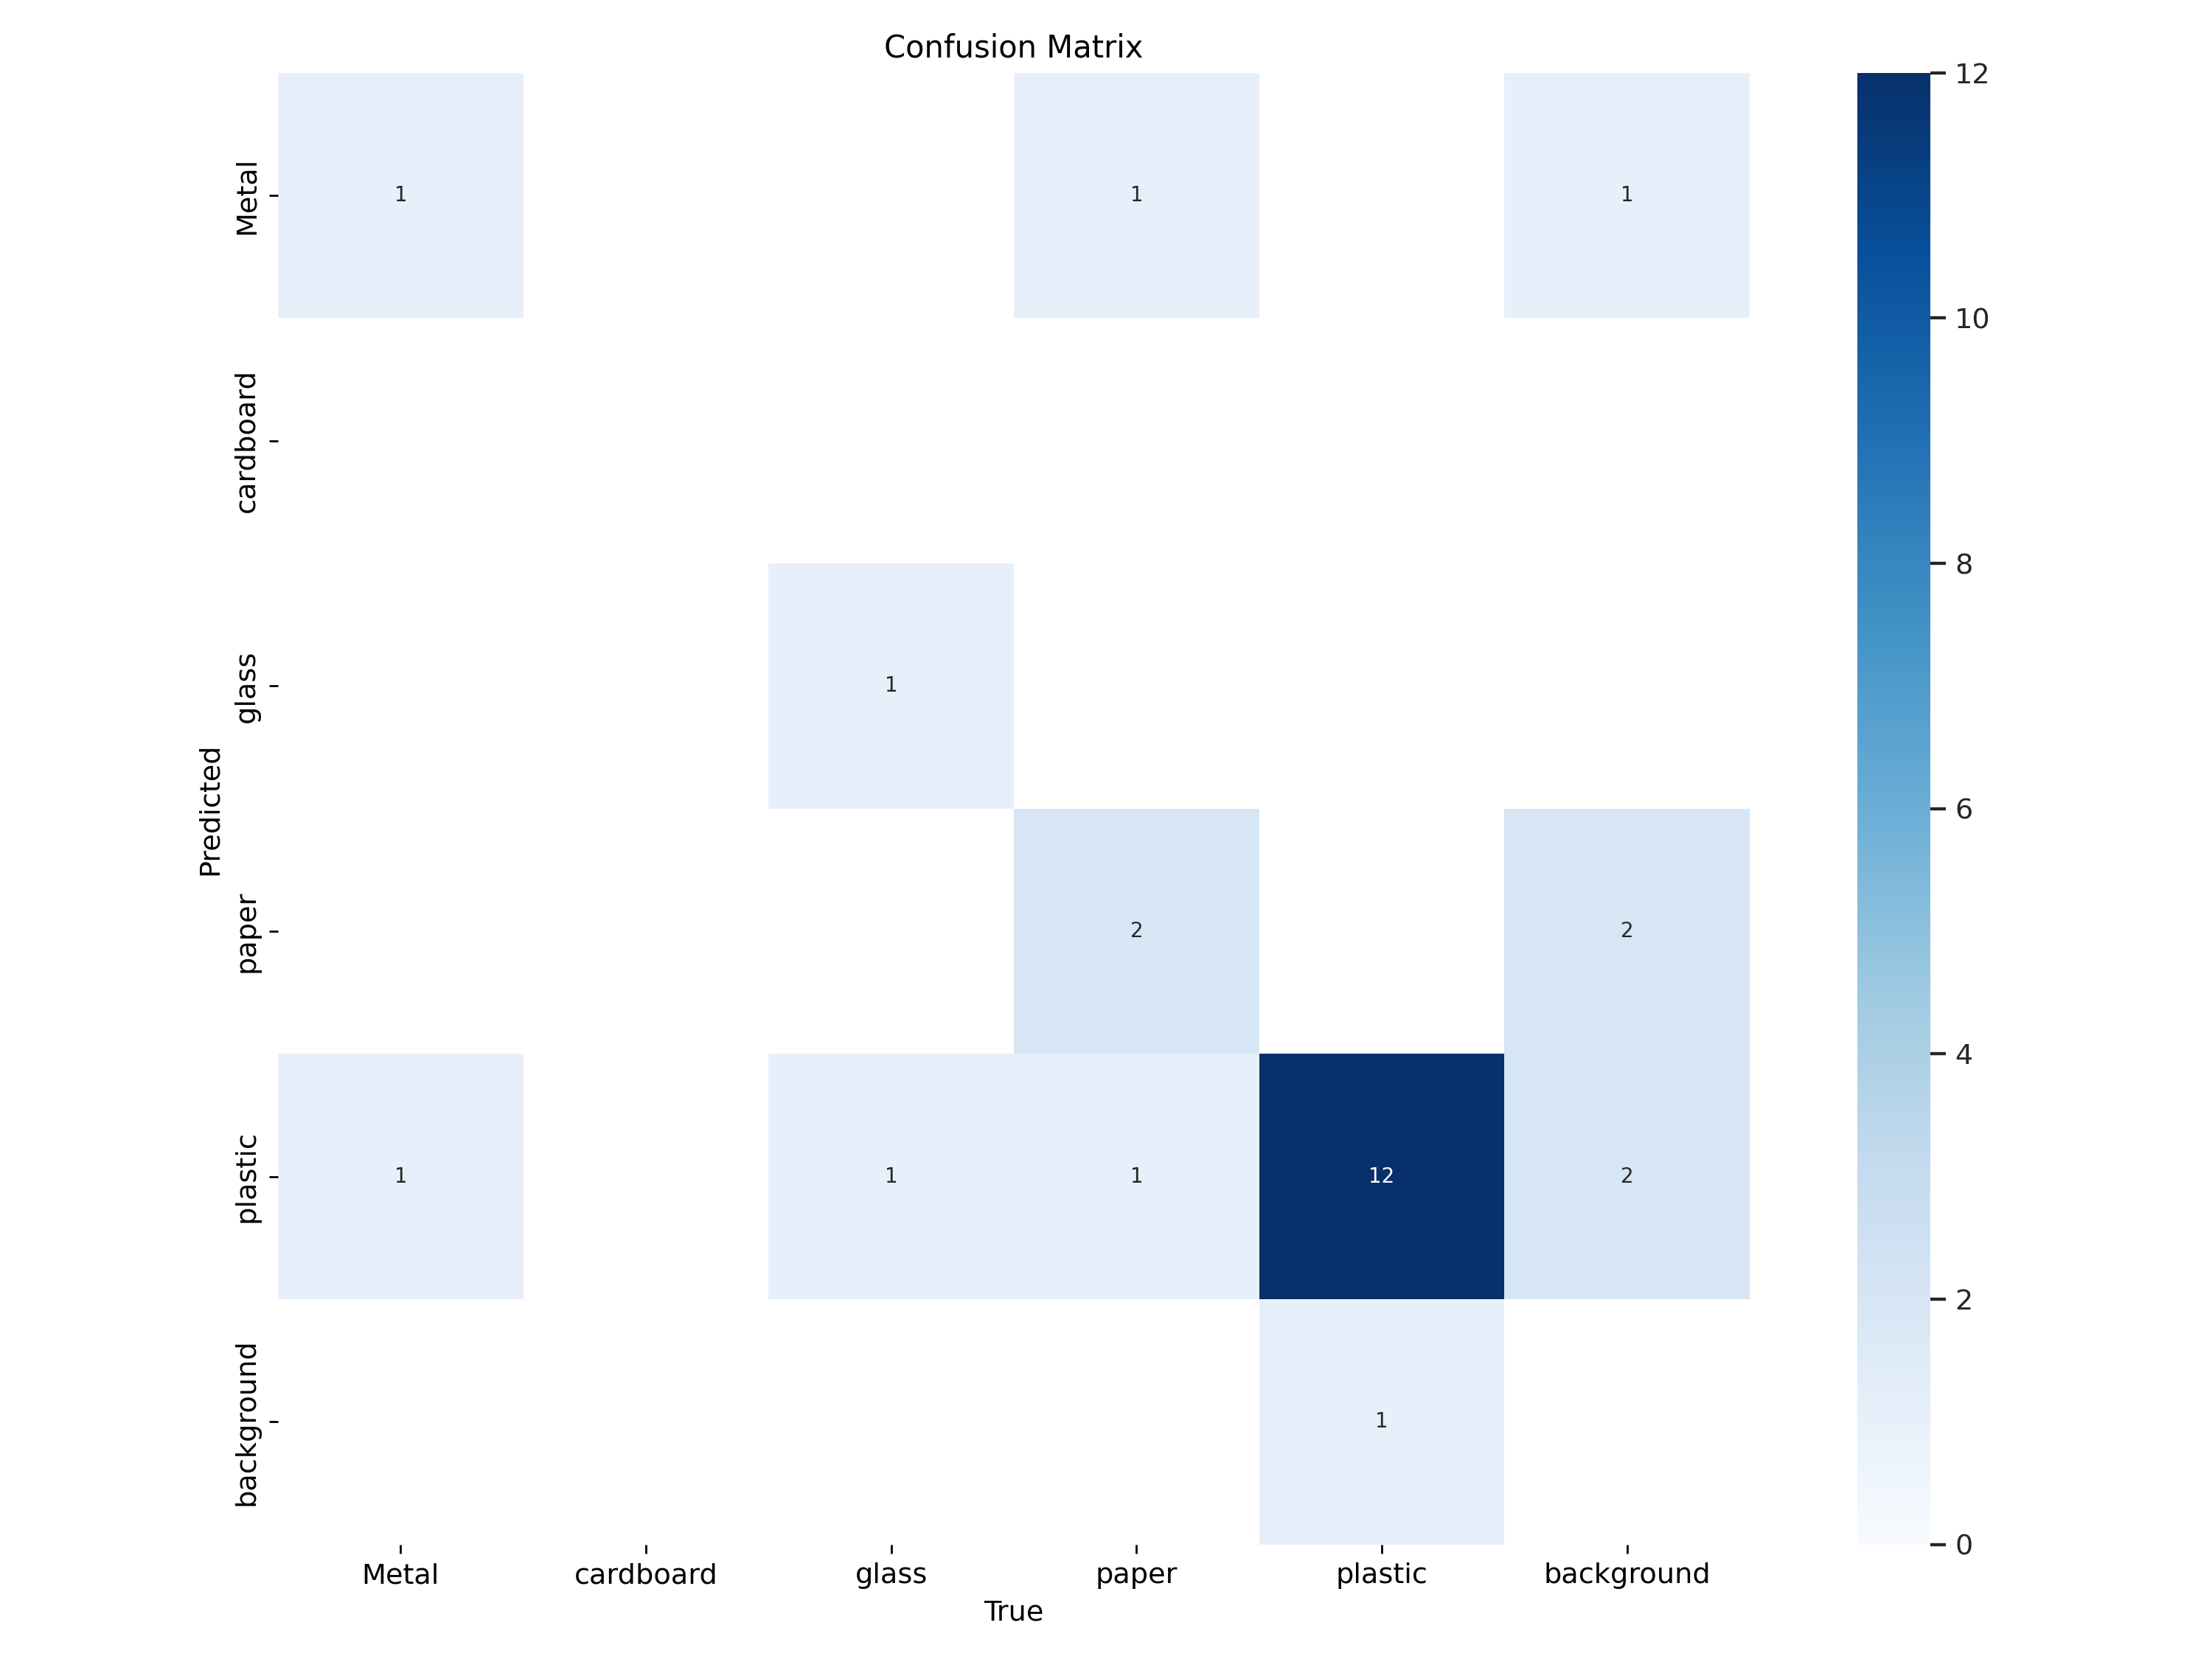

In [12]:
from IPython.display import Image
Image(filename="D:\\ImageProcessing\\runs\\detect\\train12DatasetVersion2yk\\confusion_matrix.png", width=600)

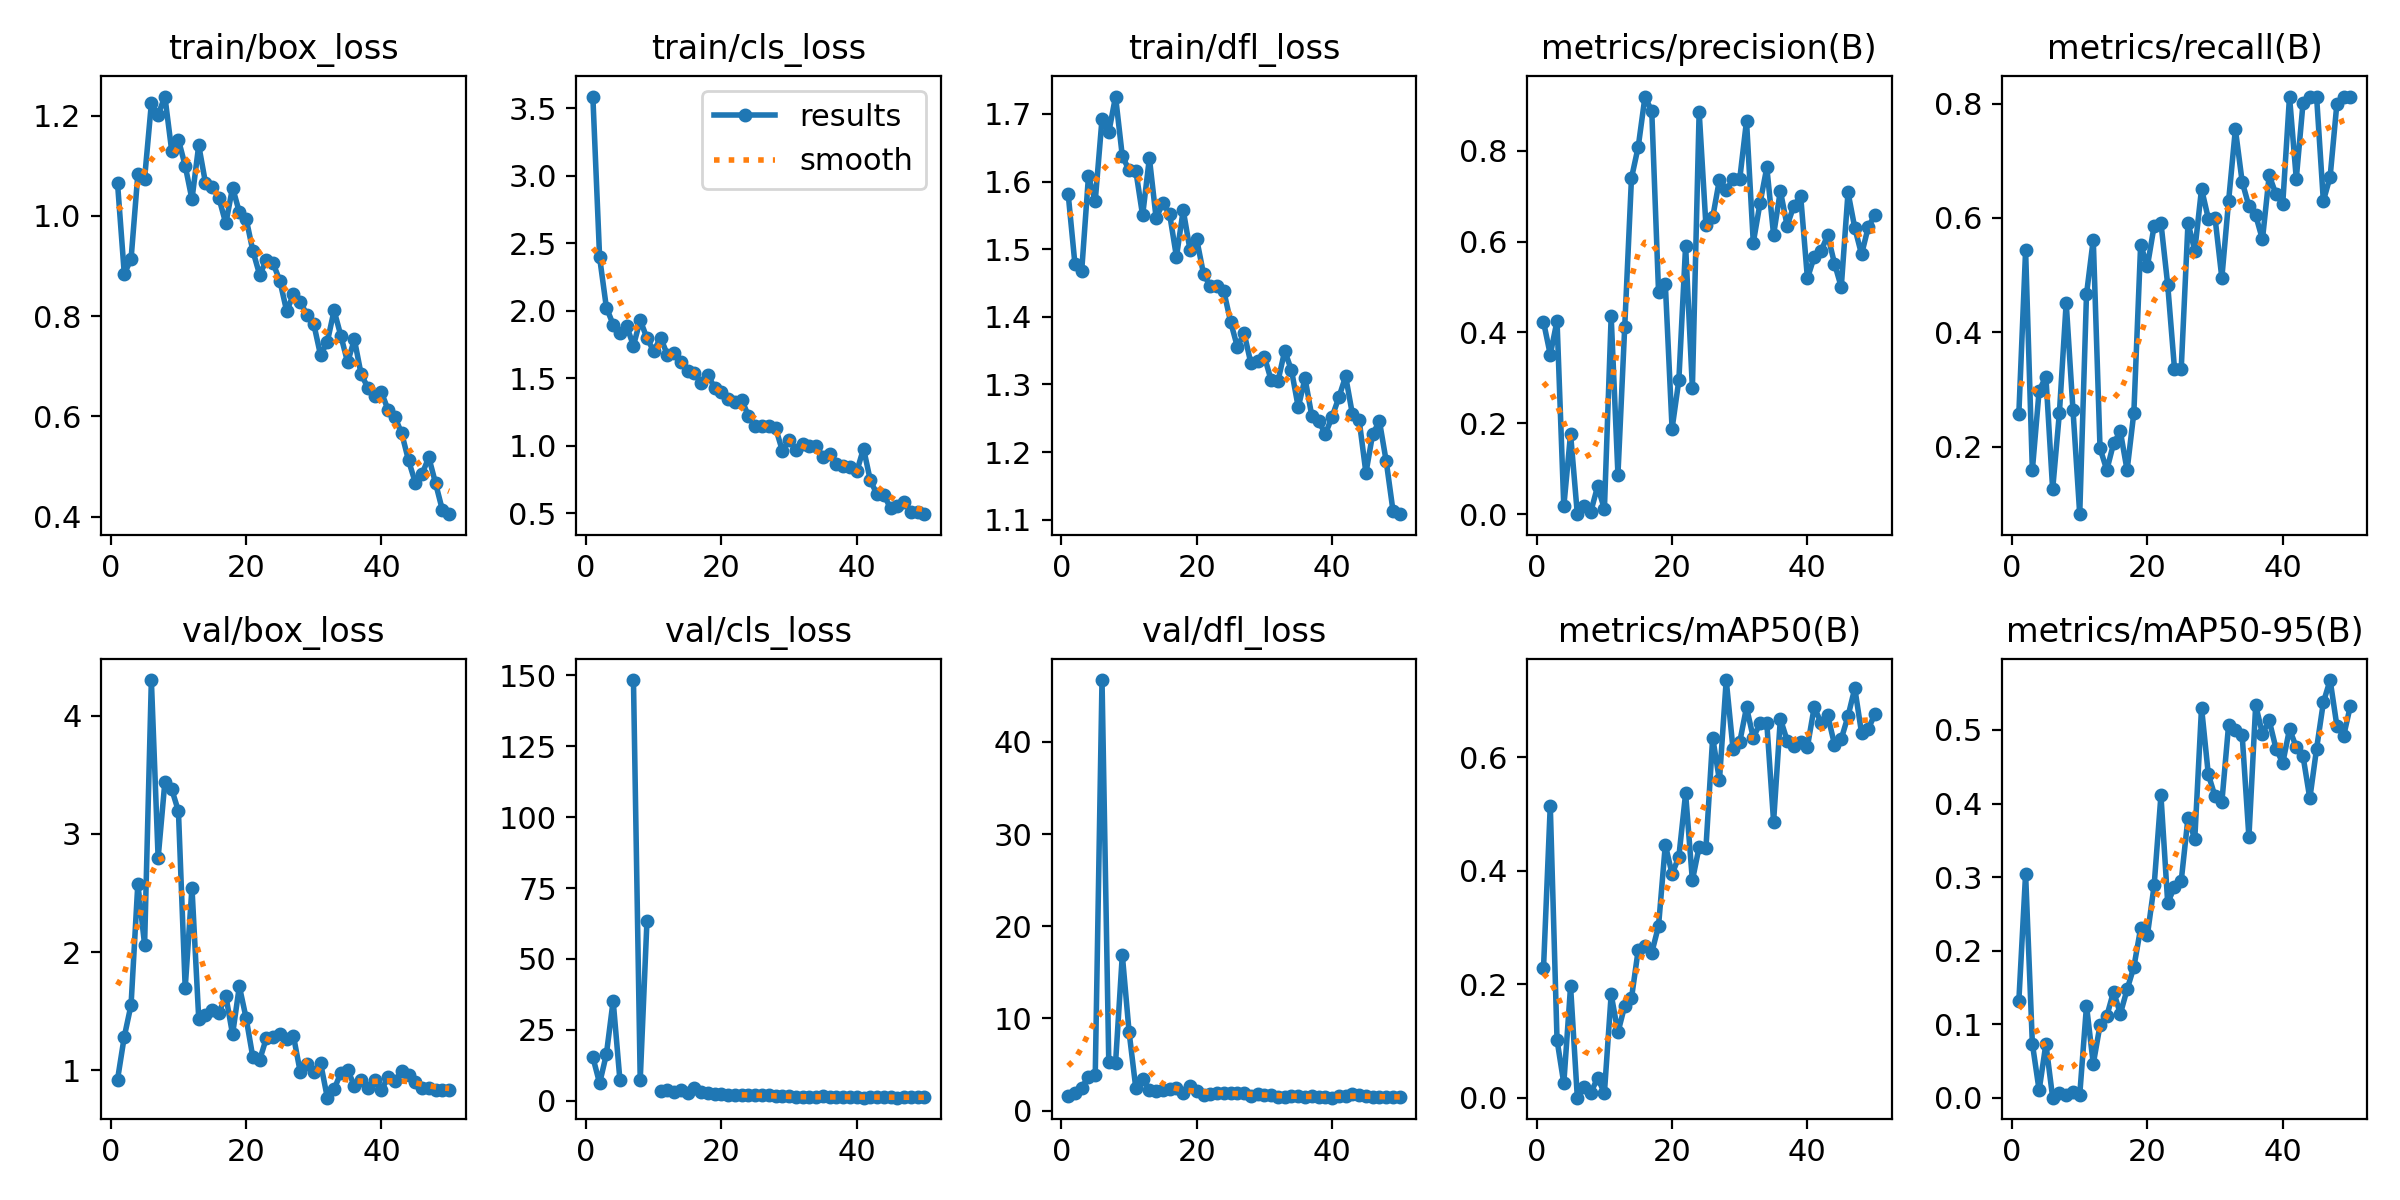

In [13]:
from IPython.display import Image
Image(filename="D:\\ImageProcessing\\runs\\detect\\train12DatasetVersion2yk\\results.png", width=600)

In [6]:

# Code for validation and know the accuracy of the classes
import torch
# Set the device to CPU
device = torch.device('cpu')

# Load the model on the CPU
image_path = "D:\\ImageProcessing\\runs\\detect\\train10\\weights\\best.pt"
model = YOLO(image_path).to(device)

# Validate the model on the CPU
metrics = model.val(device=device)  # specify the device as CPU
#metrics = model.val()  # no arguments needed, dataset and settings remembered

# Print the evaluation metrics
print("mAP (50-95):", metrics.box.map)
print("mAP@50:", metrics.box.map50)
print("mAP@75:", metrics.box.map75)
print("mAPs (per category):", metrics.box.maps)
# Print the results (bounding boxes, confidence scores, and class labels)
#print(results.pandas().xyxy[0])

Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning D:\ImageProcessing\project\Dataset\valid\labels.cache... 22 images, 2 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:37<00:00, 19.00s/it]


                   all         22         20      0.669      0.438      0.471      0.352
                 Metal         22          4      0.598       0.75      0.825      0.729
             cardboard         22          1          0          0      0.166      0.149
                 glass         22          2          1          0     0.0881     0.0787
                 paper         22          1          1          0      0.111     0.0884
               plastic         22          9      0.668      0.894      0.809      0.589
                 trash         22          3      0.746      0.985       0.83       0.48
Speed: 4.4ms preprocess, 1463.0ms inference, 0.0ms loss, 54.0ms postprocess per image
Results saved to runs\detect\val3
mAP (50-95): 0.35236464745623974
mAP@50: 0.4714607079760711
mAP@75: 0.3909385956677685
mAPs (per category): [    0.72881     0.14925     0.07873    0.088444     0.58872     0.48024]


In [17]:
import torch
# Set the device to CPU
metrics = model.val(data="D:\\ImageProcessing\\Dataset2\\data.yaml", device=device)  # specify the correct path to the 'data.yaml' file
# Print the results (bounding boxes, confidence scores, and class labels)
#print(results.pandas().xyxy[0])

# Print the evaluation metrics
print("mAP (50-95):", metrics.box.map)
print("mAP@50:", metrics.box.map50)
print("mAP@75:", metrics.box.map75)
print("mAPs (per category):", metrics.box.maps)

val: Scanning D:\ImageProcessing\Dataset2\valid\labels.cache... 22 images, 1 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 18, len(boxes) = 21. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:41<00:00, 20.56s/it]


                   all         22         21       0.63      0.672      0.721      0.566
                 Metal         22          2      0.271        0.5       0.62      0.477
                 glass         22          2      0.939        0.5      0.595      0.369
                 paper         22          4      0.641       0.75      0.787      0.762
               plastic         22         13       0.67      0.938      0.882      0.654
Speed: 18.7ms preprocess, 1540.9ms inference, 0.0ms loss, 19.7ms postprocess per image
Results saved to runs\detect\val8
mAP (50-95): 0.5656238886246058
mAP@50: 0.7209865047233468
mAP@75: 0.648383382852292
mAPs (per category): [    0.47688     0.56562     0.36945     0.76219     0.65399]


In [19]:
# First da
# Run inference on an image
results = model('D:\\ImageProcessing\\Image.jpg')  # results list
# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes


image 1/1 D:\ImageProcessing\Image.jpg: 640x384 1 plastic, 2061.8ms
Speed: 158.3ms preprocess, 2061.8ms inference, 13.5ms postprocess per image at shape (1, 3, 640, 384)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([4.])
conf: tensor([0.4841])
data: tensor([[0.0000e+00, 3.7049e+00, 6.5100e+02, 1.1538e+03, 4.8409e-01, 4.0000e+00]])
id: None
is_track: False
orig_shape: (1156, 651)
shape: torch.Size([1, 6])
xywh: tensor([[ 325.5000,  578.7748,  651.0000, 1150.1399]])
xywhn: tensor([[0.5000, 0.5007, 1.0000, 0.9949]])
xyxy: tensor([[   0.0000,    3.7049,  651.0000, 1153.8447]])
xyxyn: tensor([[0.0000, 0.0032, 1.0000, 0.9981]])


In [ ]:
# For live pedictions
from ultralytics import YOLO

model = YOLO('runs/detect/train12/weights/best.pt')
# better keep the camera close to the objects because on far distance it doesn't detect good
results = model.predict(source=1, show = True)  # save plotted images

In [ ]:
# Detect Garbage data dwidar
from ultralytics import YOLO

#model = YOLO('D:\\ImageProcessing\\runs\\detect\\train12\\weights\\best.pt')
#model = YOLO('D:\\ImageProcessing\\project\\Garbage\\data.yaml')
#model = YOLO('D:\\ImageProcessing\\project\\runs\\detect\\train21\\weights\\best.pt')
model = YOLO('D:\\ImageProcessing\\runs\\detect\\train13D\\weights\\best.pt')

results = model.predict(source=1, show = True)  # Show bounding box

In [ ]:
# This code only for predicition pictures
import os
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = YOLO('runs/detect/train10/weights/best.pt')
#weights_path = os.path.abspath('runs/detect/train/weights/best.pt')
#model = yolo.load(weights_path)
image_path = 'project/Dataset/Image.jpg'

im = Image.open(image_path)

# Set the device to CPU
model = model.to("cpu")

results = model.predict(source=im, save=True)  # save plotted images




0: 640x384 1 plastic, 434.8ms
Speed: 3.8ms preprocess, 434.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\detect\predict2


In [21]:
import os
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = YOLO('D:\\ImageProcessing\\runs\\detect\\train12DatasetVersion2yk\\weights\\best.pt')

image1 = 'D:\\ImageProcessing\\Img1.jpg'
image2 = 'D:\\ImageProcessing\\Img2.jpg'
image3 = 'D:\\ImageProcessing\\Img3.jpg'
image4 = 'D:\\ImageProcessing\\Img4.jpg'
image5 = 'D:\\ImageProcessing\\Img5.jpg'

img1 = Image.open(image1)
img2 = Image.open(image2)
img3 = Image.open(image3)
img4 = Image.open(image4)
img5 = Image.open(image5)

# Set the device to CPU
model = model.to("cpu")

result1 = model.predict(source=img1, save=True)  # save plotted images
result2 = model.predict(source=img2, save=True)  # save plotted images
result3 = model.predict(source=img3, save=True)  # save plotted images
result4 = model.predict(source=img4, save=True)  # save plotted images
result5 = model.predict(source=img5, save=True)  # save plotted images


0: 416x640 1 plastic, 828.3ms
Speed: 6.6ms preprocess, 828.3ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict

0: 384x640 1 cardboard, 1 paper, 809.3ms
Speed: 6.8ms preprocess, 809.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict

0: 608x640 1 plastic, 1040.1ms
Speed: 4.5ms preprocess, 1040.1ms inference, 3.4ms postprocess per image at shape (1, 3, 608, 640)
Results saved to runs\detect\predict

0: 384x640 1 Metal, 718.6ms
Speed: 99.7ms preprocess, 718.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict

0: 640x448 1 plastic, 868.5ms
Speed: 5.6ms preprocess, 868.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\detect\predict


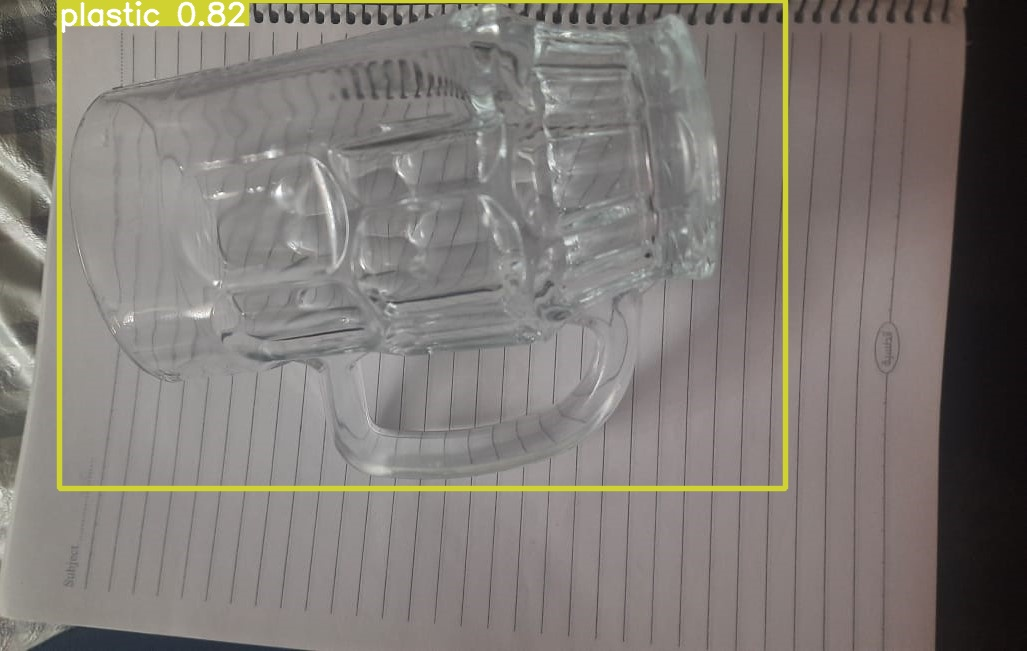

In [28]:
from IPython.display import display, Image
Image(filename='D:\\ImageProcessing\\project\\runs\\detect\\predict\\Img1.jpg', width=600) # it detects plastic beccause there isn't enough images of glass in dataset



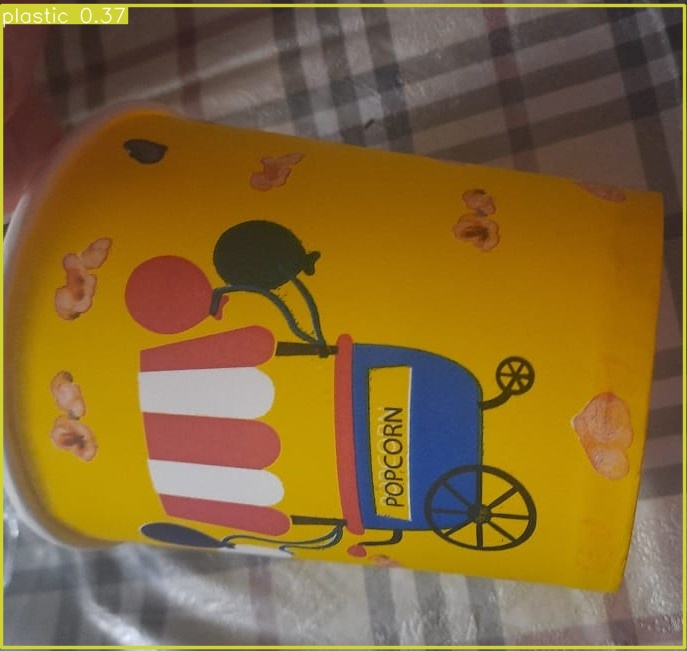

In [25]:
Image(filename='D:\\ImageProcessing\\project\\runs\\detect\\predict\\Img3.jpg', width=600)

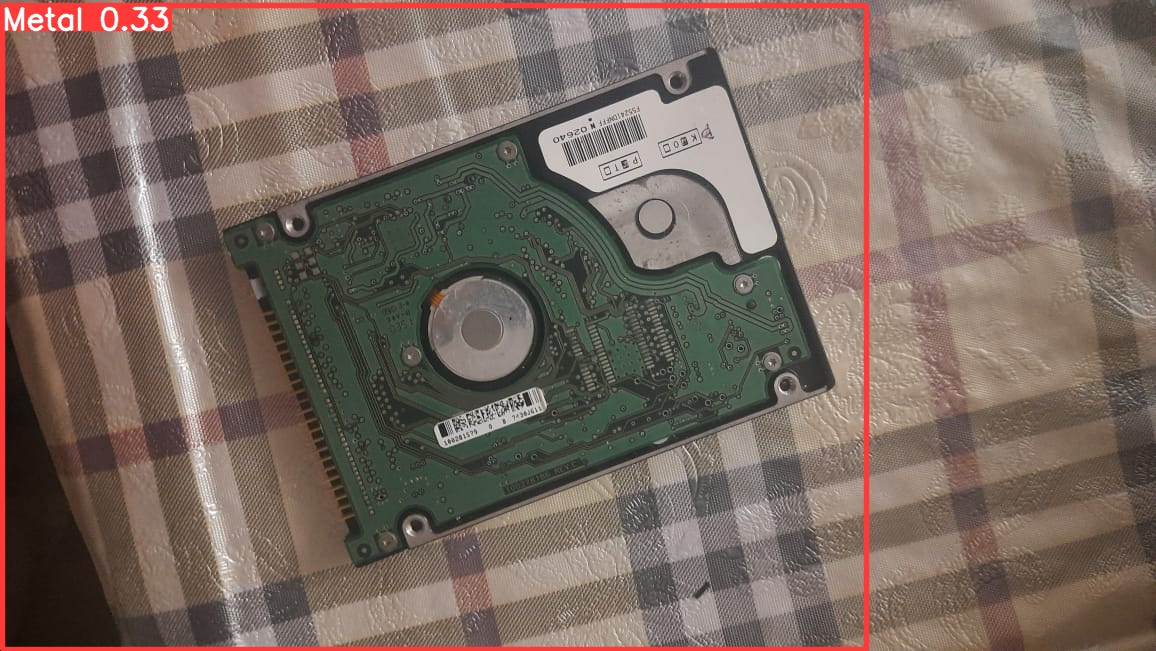

In [24]:
Image(filename='D:\\ImageProcessing\\project\\runs\\detect\\predict\\Img4.jpg', width=600)

# DRAFFTTTTT


In [49]:
Q#!pip install torch==1.4 torchvision==0.5.0
#==================================
#Detect an image
from ultralytics import YOLO
import cv2

model = YOLO("D:\\ImageProcessing\\runs\\detect\\train12\\weights\\best.pt")
camera = cv2.VideoCapture(1)  # Open webcam
img_counter = 0

while True:
    ret, frame = camera.read()
    if not ret:
        print("Failed to grab frame")
        break

    cv2.imshow("Webcam", frame)
    k = cv2.waitKey(1)

    if k % 256 == 27:  # ESC pressed
        print("Escape hit, closing...")
        break
    elif k % 256 == 32:  # SPACE pressed
        img_path = f"path/opencv_frame_{img_counter}.png"
        cv2.imwrite(img_path, frame)
        outs = model.predict(img_path)
        img_counter += 1

camera.release()
#=====================================
# Change to tflite 
# Load a model
model = YOLO('D:\\ImageProcessing\\runs\\detect\\train10\\weights\\best.pt')  # load a custom trained model

# Export the model
model.export(format='tflite')

#================================
# Save pretrained model
print(results)

model.save("Trained_garbage_model.pt")

#===============================
# trained model on roboflow and use it using api
%pip install inference
%pip install inference-gpu
import os
os.environ["ROBOFLOW_API_KEY"] = "g5dbPnMnBUuuxAUnwbsq"

import inference
model = inference.get_model("dataset-test-ypl47/1")
model.infer(image="Image.jpg")

#===========================================
# Connect to camera ip
camera_url = 'http://192.168.1.100:8080/video'
cap = cv2.VideoCapture(camera_url)

from matplotlib import pyplot as plt
from ultralytics import YOLO
model = YOLO('runs/detect/train10/weights/best.pt')
'''

while True:
    ret, img = cap.read()

    # Perform inference
    results = model([img], stream=True)
    # Process results
    for result in results:
        boxes = result.boxes
        # Add your custom annotation logic here

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
'''
# IP camera stream URL (replace with your actual IP camera URL)
#ip_camera_url = 'http://192.168.1.100:4747/video'

# Open the IP camera stream
cap = cv2.VideoCapture(1)
frame = None

if frame is not None and frame.shape[0] > 0 and frame.shape[1] > 0:
    cv2.imshow('IP Camera Feed', frame)
#cv2.destroyAllWindows()


#results = model.predict(source="0", show = True)  # save plotted images

#============================================
# download opencv
%pip install opencv-contrib-python-headless

#============================================
# using the camera
from IPython.display import display, Image

while True:
    ret, frame = cap.read()
    _, img_encoded = cv2.imencode('.jpg', frame)
    display(Image(data=img_encoded))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()

#===========================================
# using camera
import cv2

cap = cv2.VideoCapture(1)
cap.set(3, 640)  # Set width
cap.set(4, 480)  # Set height

while True:
    ret, img = cap.read()
    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
#===========================================
%pip install ipywidgets

#===========================================
# training for dataset
#Load the YOLOv8m model
model = YOLO("yolov8m.pt")
# Set the device to CPU
#model = model.to("cpu")

results = model.train(data="D:\ImageProcessing\Dataset2\data.yaml", epochs=1)

#===========================================

#!pip install torchvision==0.17.1 --index-url https://download.pytorch.org/whl/cu118
#===========================================
ip_camera_url = 'http://192.168.1.100:4747/video'
cap = cv2.VideoCapture(ip_camera_url)

cap.isOpened()
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

while True:
    ret, img = cap.read()
    frame_width=int(cap.get(3))
    frame_height=int(cap.get(4))
    # Perform inference
    results = model([img], stream=True)

    # Process results (add your custom annotation logic here)
    for result in results:
        boxes = result.boxes
        # Add your custom annotation logic here

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # Optionally, break the loop if a specific key is pressed (e.g., 'q')
    #if cv2.waitKey(1) == ord('q'):
    #    break
#=============================================

from IPython.display import Image
from PIL import Image
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    # Perform inference
    #results = model([img], stream=True)

    # Process results (add your custom annotation logic here)
    #for result in results:
    #   boxes = result.boxes
        # Add your custom annotation logic here

    #display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
    #  break

cap.release()
cv2.destroyAllWindows()

#===================================
!yolo predict model=yolov8m.pt source=0 imgsz=640
#===================================
# # Training a model for detection
!yolo task=detect mode=train model=yolov8m.pt data = {dataset.location}/data.yaml epochs=10 imgsz=416 
#====================================
Image(filename='D:\\ImageProcessing\\runs\\detect\\predict3\\Img2.jpg', width=600)
#Image(filename='D:\\ImageProcessing\\runs\\detect\\predict3\\Img3.jpg', width=600)
#Image(filename='D:\\ImageProcessing\\runs\\detect\\predict3\\Img4.jpg', width=600)
#Image(filename='D:\\ImageProcessing\\runs\\detect\\predict3\\Img5.jpg', width=600)
#=====================================================================================
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'D:\ImageProcessing\project\Dataset\Image.jpg'):
    display(Image(filename=image_path, height=600))
print("\n") 
#display image

ERROR: Could not find a version that satisfies the requirement torch==1.4 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0)
ERROR: No matching distribution found for torch==1.4
